# EGFwD Project 2: Investigate a Dataset (TMDB Movies Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling, Preprocessing, and Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#questions">Answering Questions</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

---

<a id='intro'></a>
## Introduction

In this notebook, I will do some analysis on the dataset of TMDB Movies. It includes roughly 10k rows each with many features that we will explore and wrangle in the next sections. The Features Given are: popularity, title, budget, revenue, ... etc.
The data is collected via TMDB API, and in this notebook I will try to answer some questions like:

1. Does Number of Movies per year changes over time?
2. Does Release Month Affect the Revenue of the Movie?
3. Which 5 Genres are most popular?
4. Which genre is the most popular genre every year? Did the Trend change from the past?
5. Top production companies that have highest profits?
6. Which Length of movies has the highest interest of people?
7. Most Frequent Star?
8. Top 10 Directors, directed most movies?
9. Top 10 Movies of all time, based on popularity?

But first things first, we need to explore the data, clean it, and then assess to answer these questions

### Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

---
<a id='wrangling'></a>
## Data Wrangling, Preprocessing, and Cleaning

In this section I will load the data, and then check for data cleanliness, and then, I will take proper actions to further clean the data.

### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv', index_col = 'id')

Since the id column is unique for each row, then we can use it as an index.

**Check Dataframe shape, how many instances, and how many feature?**

In [3]:
df.shape

(10866, 20)

Based on the above cell, we can see that this data has **10866 rows**, and **20 columns** because the id became an index.

**Take a look at the data, see the first 5 rows...**

In [4]:
df.head(5)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Based on the above cell, I can conclude that imdb_id, homepage, tagline, overview are not interesting to my analysis, they give no added value, neither answer any of my questions.
Also, I can depend on budget_adj and revenue_adj and drop the budget and revenue columns for a fair comparison between movies.

**Drop uninteresting columns**

In [5]:
cols = ['imdb_id', 'homepage', 'tagline','keywords' ,'overview', 'budget', 'revenue']

df.drop(cols, axis = 1, inplace = True)

**Check updated df, to make sure that changes occurred correctly**

In [6]:
df.head(2)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,
135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


**Info gives intuition to which columns have null values, and the datatype of each column**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   original_title        10866 non-null  object 
 2   cast                  10790 non-null  object 
 3   director              10822 non-null  object 
 4   runtime               10866 non-null  int64  
 5   genres                10843 non-null  object 
 6   production_companies  9836 non-null   object 
 7   release_date          10866 non-null  object 
 8   vote_count            10866 non-null  int64  
 9   vote_average          10866 non-null  float64
 10  release_year          10866 non-null  int64  
 11  budget_adj            10866 non-null  float64
 12  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 1.2+ MB


Based on the above cell, we can clearly see that cast, director, genres, and production companies have null values

**Describe gives some statistical Intuition to numeric columns**

In [8]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


I suspect there is an error in the data, runtime/budget/revenue can't be 0 and the minimum = 0.

**dtypes shows datatype each column**

In [9]:
df.dtypes

popularity              float64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Based on the Above cell, release data should be datetime

In [10]:
df['release_date'] =  pd.to_datetime(df['release_date'])

**Check if year in release date is contradicting with release year**

In [11]:
df.query('release_date.dt.year != release_year')

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,
62,3.309196,2001: A Space Odyssey,Keir Dullea|Douglas Rain|Gary Lockwood|William...,Stanley Kubrick,149,Science Fiction|Mystery|Adventure,Stanley Kubrick Productions|Metro-Goldwyn-Maye...,2068-04-05,1708,7.7,1968,7.522756e+07,3.555466e+08
871,1.152937,Planet of the Apes,Charlton Heston|Roddy McDowall|Kim Hunter|Maur...,Franklin J. Schaffner,112,Adventure|Science Fiction|Mystery,Twentieth Century Fox Film Corporation|APJAC P...,2068-02-07,469,7.2,1968,3.635999e+07,2.093547e+08
10331,1.058272,Night of the Living Dead,Duane Jones|Judith O'Dea|Karl Hardman|Marilyn ...,George A. Romero,96,Horror,Laurel Group|Off Color Films|Image Ten|Market ...,2068-10-01,279,7.2,1968,7.146619e+05,0.000000e+00
26690,0.891163,The Boston Strangler,Tony Curtis|Henry Fonda|George Kennedy|Mike Ke...,Richard Fleischer,116,Crime|Drama|Mystery|Thriller,Twentieth Century Fox Film Corporation,2068-10-08,15,6.6,1968,0.000000e+00,0.000000e+00
8069,0.867192,Barbarella,Jane Fonda|John Phillip Law|Anita Pallenberg|M...,Roger Vadim,98,Science Fiction,Dino de Laurentiis Cinematografica|Marianne Pr...,2068-10-10,63,5.4,1968,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,0.080598,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,0.000000e+00,0.000000e+00
20379,0.065543,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,0.000000e+00,0.000000e+00
39768,0.065141,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966,0.000000e+00,0.000000e+00


Based on the above cell, when changing to datetime, it converted 66 for example as 2066 not 1966
Since I don't need the whole release date, I would just extract the month from it, and drop the column.

**Extract Month from Release Date**

In [12]:
df['release_month'] = df['release_date'].dt.month

**Drop Release Date, since I don't need it anymore**

In [13]:
df.drop(labels='release_date',axis = 1, inplace = True)

**Check for Duplicate Rows**

In [14]:
print('There exist(s) {} duplicate row(s).'.format(sum(df.duplicated())))

There exist(s) 1 duplicate row(s).


**Drop duplicates**

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
print('There exist(s) {} duplicate row(s).'.format(sum(df.duplicated())))

There exist(s) 0 duplicate row(s).


**Check for Missing Values per column**

In [17]:
df.isnull().sum()

popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
release_month              0
dtype: int64

**Since cast, director, and genres have small percentage of missing values, then we can drop them without affecting my analysis**

In [18]:
df.dropna(inplace=True, subset=['cast', 'director', 'genres'])

**Make sure that nulls are dropped**

In [19]:
df.isnull().sum()

popularity                0
original_title            0
cast                      0
director                  0
runtime                   0
genres                    0
production_companies    959
vote_count                0
vote_average              0
release_year              0
budget_adj                0
revenue_adj               0
release_month             0
dtype: int64

**Production companies affect my analysis, and it has large number of missing values, one way of handling this, is by adding a global constant to these nulls**

In [20]:
df['production_companies'].fillna('Null',inplace=True)

**Confirm that there are no NaNs now** 

In [21]:
df.isnull().sum()

popularity              0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
release_month           0
dtype: int64

**Rename Columns for better usability**

In [22]:
df.rename(columns={"budget_adj": "budget", "revenue_adj": "revenue"}, inplace=True)

In [23]:
df.head(2)

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget,revenue,release_month
id,,,,,,,,,,,,,
135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,6
76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,5


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 135397 to 22293
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10731 non-null  float64
 1   original_title        10731 non-null  object 
 2   cast                  10731 non-null  object 
 3   director              10731 non-null  object 
 4   runtime               10731 non-null  int64  
 5   genres                10731 non-null  object 
 6   production_companies  10731 non-null  object 
 7   vote_count            10731 non-null  int64  
 8   vote_average          10731 non-null  float64
 9   release_year          10731 non-null  int64  
 10  budget                10731 non-null  float64
 11  revenue               10731 non-null  float64
 12  release_month         10731 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 1.1+ MB


In [25]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget,revenue,release_month
count,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04,10731.000000
mean,0.652615,102.468829,219.812972,5.964710,2001.259622,1.776530e+07,5.200623e+07,6.832448
std,1.004804,30.493873,578.815324,0.930283,12.820151,3.446630e+07,1.454252e+08,3.434309
min,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,1.000000
25%,0.210765,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,4.000000
50%,0.387081,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,7.000000
75%,0.720889,112.000000,148.000000,6.600000,2011.000000,2.110885e+07,3.470546e+07,10.000000
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,12.000000


**Taking Proper Action to Zero Values, that can't be Zeroes:**

Replacing them with NaN

In [26]:
df['runtime'] =df['runtime'].replace(0, np.NAN)
df['budget'] =df['budget'].replace(0, np.NAN)
df['revenue'] =df['revenue'].replace(0, np.NAN)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 135397 to 22293
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10731 non-null  float64
 1   original_title        10731 non-null  object 
 2   cast                  10731 non-null  object 
 3   director              10731 non-null  object 
 4   runtime               10703 non-null  float64
 5   genres                10731 non-null  object 
 6   production_companies  10731 non-null  object 
 7   vote_count            10731 non-null  int64  
 8   vote_average          10731 non-null  float64
 9   release_year          10731 non-null  int64  
 10  budget                5153 non-null   float64
 11  revenue               4843 non-null   float64
 12  release_month         10731 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 1.1+ MB


**Filling those null Values with the Median.**

Not mean, since the mean is really affected by outliers, so smoothing those values with the mean would be a better option

In [28]:
df.fillna(df.median(), inplace = True)

C:\Users\steve\AppData\Local\Temp/ipykernel_15332/3097012583.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace = True)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 135397 to 22293
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10731 non-null  float64
 1   original_title        10731 non-null  object 
 2   cast                  10731 non-null  object 
 3   director              10731 non-null  object 
 4   runtime               10731 non-null  float64
 5   genres                10731 non-null  object 
 6   production_companies  10731 non-null  object 
 7   vote_count            10731 non-null  int64  
 8   vote_average          10731 non-null  float64
 9   release_year          10731 non-null  int64  
 10  budget                10731 non-null  float64
 11  revenue               10731 non-null  float64
 12  release_month         10731 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 1.1+ MB


**Adding Column of Net Profit to be used for my Analysis**

In [30]:
df['net_profit'] = df['revenue'] - df['budget']

In [31]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget,revenue,release_month,net_profit
count,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04,10731.000000,1.073100e+04
mean,0.652615,102.727146,219.812972,5.964710,2001.259622,2.965769e+07,7.616442e+07,6.832448,4.650672e+07
std,1.004804,30.040664,578.815324,0.930283,12.820151,2.993339e+07,1.382591e+08,3.434309,1.226908e+08
min,0.000188,3.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00,1.000000,-4.139124e+08
25%,0.210765,90.000000,17.000000,5.400000,1995.000000,2.287867e+07,4.402879e+07,4.000000,1.700400e+07
50%,0.387081,99.000000,39.000000,6.000000,2006.000000,2.287867e+07,4.402879e+07,7.000000,2.115012e+07
75%,0.720889,112.000000,148.000000,6.600000,2011.000000,2.287867e+07,4.402879e+07,10.000000,3.435627e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,12.000000,2.750137e+09


The Describe cell above gives satisfying results on the data, the data is now clean, and can be used for EDA.

**Making New Tables for Genres and Cast, to be easier to use in answering questions**

> The Below function is taken from a discourse answer given by a tutor

In [32]:
def split_columns(df, column, separator):
    l = df[column].str.split(separator, expand=True)
    return l

In [33]:
genres_df = split_columns(df,'genres','|')
cast_df = split_columns(df,'cast','|')

In [34]:
genres_df

,0,1,2,3,4
id,,,,,
135397,Action,Adventure,Science Fiction,Thriller,None
76341,Action,Adventure,Science Fiction,Thriller,None
262500,Adventure,Science Fiction,Thriller,None,None
140607,Action,Adventure,Science Fiction,Fantasy,None
168259,Action,Crime,Thriller,None,None
...,...,...,...,...,...
21,Documentary,None,None,None,None
20379,Action,Adventure,Drama,None,None
39768,Mystery,Comedy,None,None,None


In [35]:
cast_df

,0,1,2,3,4
id,,,,,
135397,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
76341,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
262500,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
140607,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
168259,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson
...,...,...,...,...,...
21,Michael Hynson,Robert August,Lord 'Tally Ho' Blears,Bruce Brown,Chip Fitzwater
20379,James Garner,Eva Marie Saint,Yves Montand,ToshirÅ Mifune,Brian Bedford
39768,Innokentiy Smoktunovskiy,Oleg Efremov,Georgi Zhzhyonov,Olga Aroseva,Lyubov Dobrzhanskaya


In [36]:
genres_df = genres_df.stack()

genres_df = pd.DataFrame(genres_df)
genres_df.head()

0
id                       
135397 0           Action
       1        Adventure
       2  Science Fiction
       3         Thriller
76341  0           Action

In [37]:
cast_df = pd.DataFrame(cast_df.stack())

In [38]:
cast_df.head()

0
id                           
135397 0          Chris Pratt
       1  Bryce Dallas Howard
       2          Irrfan Khan
       3    Vincent D'Onofrio
       4        Nick Robinson

---
<a id='eda'></a>
## Exploratory Data Analysis


**Check For Correlation between any two features, using heatmap for pearson coeffecient**

The nearer the value to one, the more positively correlated the features are.
The nearer the value to -1, the more negatively correlated the features are.

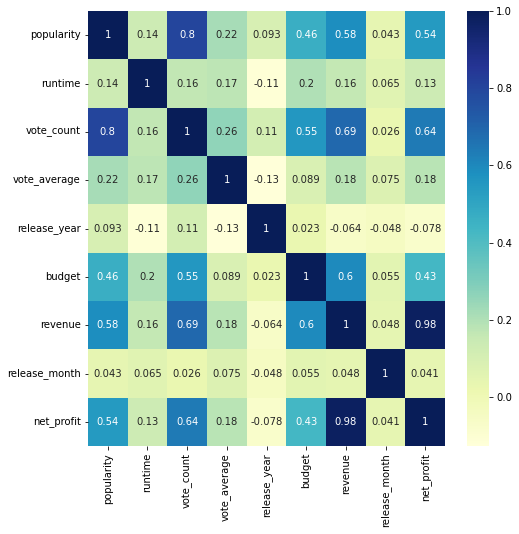

In [39]:
fig, ax = plt.subplots(figsize=(8,8))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, ax=ax)
  
plt.show()

Suspect Correlations between:
* popularity and vote count
* popularity and budget
* popularity and revenue
* popularity and net profit
* vote count and budget
* vote count and revenue
* vote count and net profit
* budget and revenue
* budget and net profit
* revenue and net profit

We would draw scatter plots to visualize these correlations, however since popularity and vote count are correlated, budget, revenue and correlated to net profit, so we can conclude that only these are important:
* popularity and vote count
* budget and revenue
* revenue and net profit
* Popularity and net profit

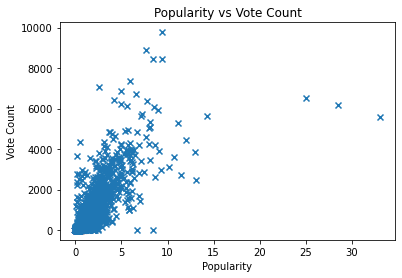

In [40]:
plt.scatter(x=df.popularity, y=df.vote_count, marker='x',cmap='YlGnBu')
plt.gca().update(dict(title='Popularity vs Vote Count', xlabel='Popularity', ylabel='Vote Count'));

We Can Clearly Conclude and visualize the positive correlation, which is logical that people will review what is popular, cause they have more percentage of watching the movie!

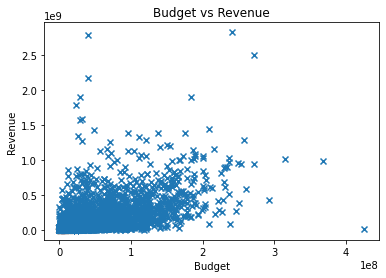

In [41]:
plt.scatter(x=df.budget, y=df.revenue, marker='x',cmap='YlGnBu')
plt.gca().update(dict(title='Budget vs Revenue', xlabel='Budget', ylabel='Revenue'));

We Can Clearly Conclude and visualize the positive correlation, which is logical that the more someone pays as a budget, the more revenue they will get!

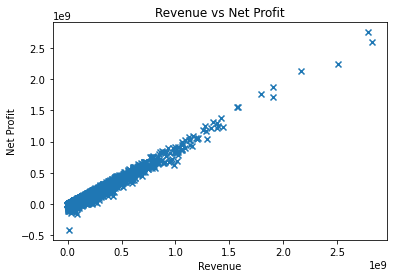

In [42]:
plt.scatter(x=df.revenue, y=df.net_profit, marker='x',cmap='YlGnBu')
plt.gca().update(dict(title='Revenue vs Net Profit', xlabel='Revenue', ylabel='Net Profit'));

The positive correlation is logical, because the more a movie gets a revenue, the more profit it reaches!

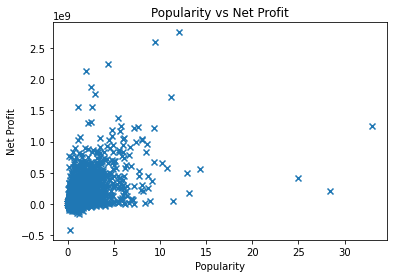

In [43]:
plt.scatter(x=df.popularity, y=df.net_profit, marker='x',cmap='YlGnBu')
plt.gca().update(dict(title='Popularity vs Net Profit', xlabel='Popularity', ylabel='Net Profit'));

Kind of positive relationship between both, it's not strong, but it exists, and it is logical because the more popular a movie is, the higher net profit it will have because people watched it more!

**Let's move to Histograms, to show distribution of each individual column**

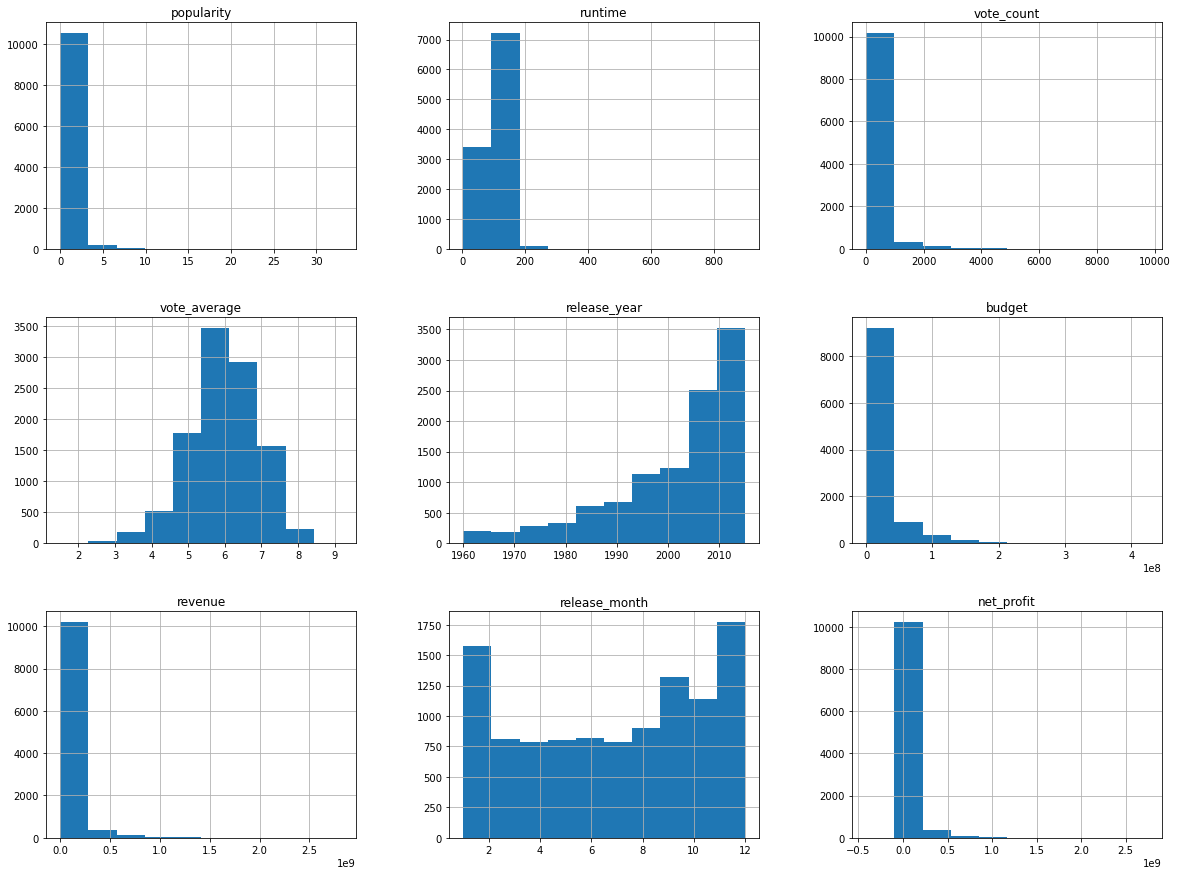

In [44]:
df.hist(figsize = (20,15));

Looks like there exists interesting outliers in popularity, votecount ,runtime, netprofit, revenue, and budget.
Most of the Movies are almost averaged, however there exists some movies in each of these features that interestingly stand out!

Release year shows that number of movies is increasing as year passes, Cool!
Vote average is a normal distribution
release minth shows that months 12, 1 have higher frequencies of released movies!

---
<a id='questions'></a>

## Answering Questions:

### 1) Does Number of Movies per year changes over time?

In [45]:
data = df.groupby('release_year').count()['popularity']

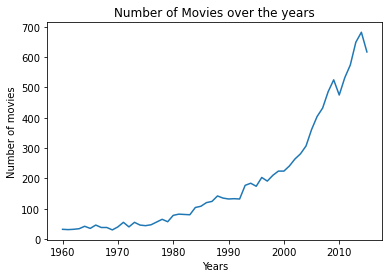

In [46]:
plt.plot(data)
plt.gca().update(dict(title='Number of Movies over the years', xlabel='Years', ylabel='Number of movies'));

**Answer**:
Based on the above graph, we can conclude that as time passes, number of movies produces is higher!

### 2) Does Release Month Affect the Revenue of the Movie?

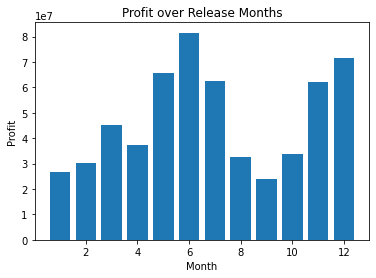

In [47]:
data = df.groupby('release_month')['net_profit'].mean()

plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],data)
plt.gca().update(dict(title='Profit over Release Months', xlabel='Month', ylabel='Profit'));

**Answer:** YES!! Movies Released in months 5,6,7,11,12 have higher tendency of success based on Net Profit!

### 3) Which 5 Genres are most popular?

In [48]:
genres_df.rename(columns={0:'genres_adj'}, inplace=True)
data = genres_df.genres_adj.value_counts()[0:5]
data

Drama       4746
Comedy      3775
Thriller    2902
Action      2376
Romance     1708
Name: genres_adj, dtype: int64

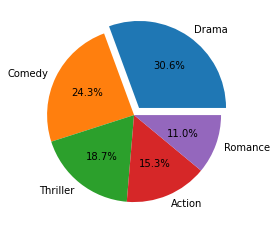

In [49]:
labels = ['Drama','Comedy','Thriller','Action','Romance']
explode = (0.1,0,0,0,0)
plt.pie(data,labels=labels,explode = explode,autopct='%1.1f%%');

**Answer:** Top 5 Genres of All time:
1. Drama
2. Comedy
3. Thriller
4. Action
5. Romance

### 4) Which genre is the most popular genre every year? Did the Trend change from the past?

In [50]:
df_merged = df.merge(genres_df, left_on='id', right_on='id')

In [51]:
years = df_merged.release_year.unique()
df_years_genres = pd.DataFrame(years)
genres = list()
for year in years:
    stri = 'release_year == {}'.format(year)
    l = list()
    l = df_merged.query(stri).genres_adj
    l = l.to_list()
    genres.append(max(l, key = l.count))    

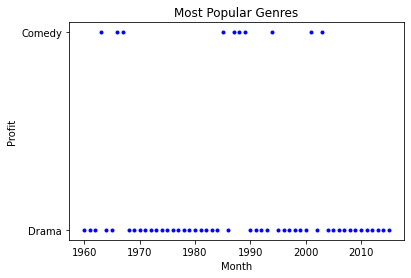

In [52]:
plt.plot(years, genres, 'b.')
plt.gca().update(dict(title='Most Popular Genres', xlabel='Month', ylabel='Profit'));

In [53]:
genres = pd.DataFrame(genres)
genres.value_counts()

Drama     46
Comedy    10
dtype: int64

**Answer:** Based on the above cell and graph, The most popular genre per year is either Drama or Comedy, It's comedy 10 years, and Drama for 46 years, Drama is the most popular genre per year!! No the trend of loving drama is almost constant over the years!

### 5) Top 5 production companies that have highest profits?

In [54]:
prod_df = df['production_companies'].str.split("|", expand=True)

In [55]:
prod_df

,0,1,2,3,4
id,,,,,
135397,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
76341,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
262500,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
140607,Lucasfilm,Truenorth Productions,Bad Robot,None,None
168259,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films
...,...,...,...,...,...
21,Bruce Brown Films,None,None,None,None
20379,Cherokee Productions,Joel Productions,Douglas & Lewis Productions,None,None
39768,Mosfilm,None,None,None,None


In [56]:
prod_df = prod_df.stack()

prod_df = pd.DataFrame(prod_df)
prod_df.rename(columns={0:'prod_adj'}, inplace=True)
prod_df.head()

prod_adj
id                               
135397 0        Universal Studios
       1     Amblin Entertainment
       2       Legendary Pictures
       3  Fuji Television Network
       4                   Dentsu

In [57]:
df_merged = df.merge(prod_df, left_on='id', right_on='id')

In [58]:
df_merged

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget,revenue,release_month,net_profit,prod_adj
id,,,,,,,,,,,,,,,
135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,6,1.254446e+09,Universal Studios
135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,6,1.254446e+09,Amblin Entertainment
135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,6,1.254446e+09,Legendary Pictures
135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,6,1.254446e+09,Fuji Television Network
135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,6,1.254446e+09,Dentsu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20379,0.065543,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176.0,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,20,5.7,1966,2.287867e+07,4.402879e+07,12,2.115012e+07,Joel Productions
20379,0.065543,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176.0,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,20,5.7,1966,2.287867e+07,4.402879e+07,12,2.115012e+07,Douglas & Lewis Productions
39768,0.065141,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94.0,Mystery|Comedy,Mosfilm,11,6.5,1966,2.287867e+07,4.402879e+07,1,2.115012e+07,Mosfilm


In [59]:
l = df_merged.groupby('prod_adj').sum()['net_profit'].sort_values(ascending = False)

In [60]:
l = pd.DataFrame(l)

In [61]:
l = l.head(15)
l.drop('Null', inplace = True)

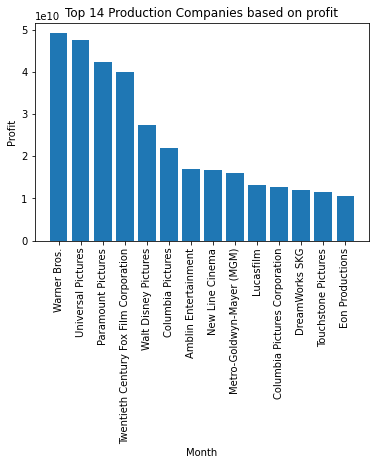

In [62]:
plt.bar(l.index.values.tolist(),l['net_profit'])
plt.rcParams["figure.figsize"] = (20,5)
plt.xticks(rotation='vertical')
plt.gca().update(dict(title='Top 14 Production Companies based on profit', xlabel='Month', ylabel='Profit'));

**Answer:** Top Producing Companies are: 
1. Warner Bros
2. Universal Pictures
3. Paramount Pictures

### 6) Which Length of movies has the highest interest of people?

In [63]:
l = df.groupby('runtime').mean()['popularity']

In [64]:
l = pd.DataFrame(l)
l

,popularity
runtime,
3.0,0.218169
4.0,0.467001
5.0,0.526701
6.0,0.251966
7.0,0.392681
...,...
550.0,0.137913
566.0,0.147489
705.0,0.537593


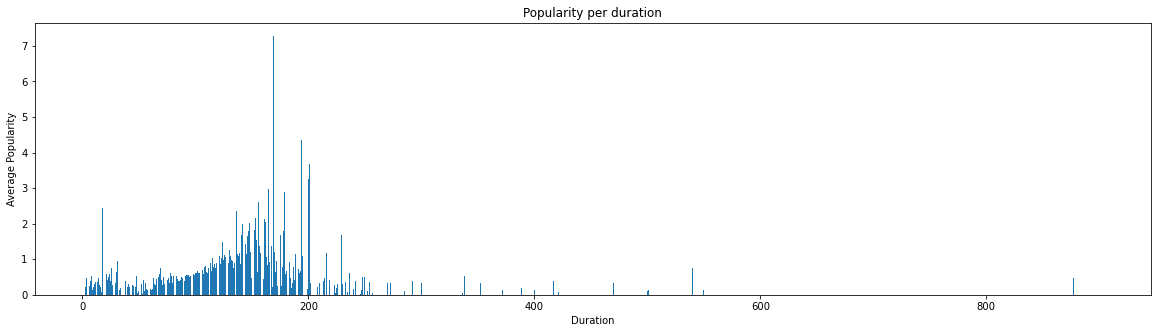

In [65]:
plt.bar(l.index.values.tolist(),l['popularity'])
plt.rcParams["figure.figsize"] = (20,5)
plt.gca().update(dict(title='Popularity per duration', xlabel='Duration', ylabel='Average Popularity'));

In [66]:
l.query('popularity > 7')

,popularity
runtime,
169.0,7.279679


**Answer:** Based on the Above diagram, we can conclude that runtime = 169 has highest average popularity, then it is the most loved by people!

### 7) Most Frequent Star?

In [67]:
cast_df.value_counts()

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
                     ..
Jake McKinnon         1
Jake Miller           1
Jake Mosser           1
Jake Sandvig          1
é‚±æ·‘è²ž             1
Length: 18930, dtype: int64

**Answer:** Most frequent Star is Robert De Niro with 72 Occurance in Movies

### 8) Top 10 Directors, directed most movies?

In [68]:
l = df.groupby('director').count()['popularity'].sort_values(ascending = False)

In [69]:
l = pd.DataFrame(l)
l

,popularity
director,
Woody Allen,45
Clint Eastwood,34
Steven Spielberg,29
Martin Scorsese,28
Ridley Scott,23
...,...
James Hawes,1
James Healey,1
James Hill,1


In [70]:
l = l.head(10)

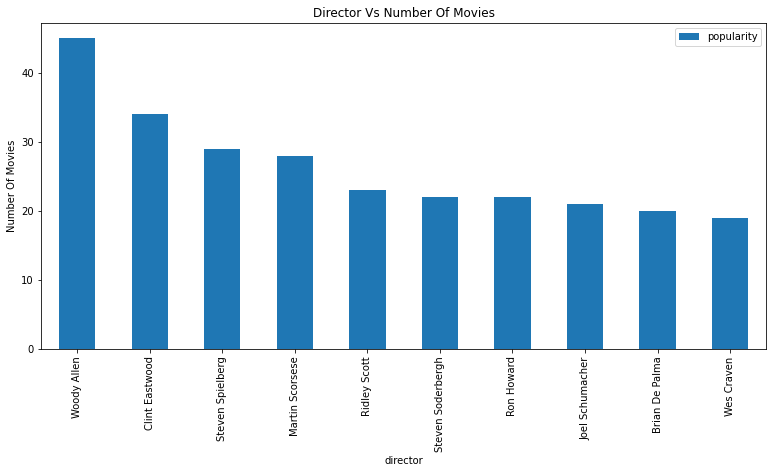

In [71]:
l.plot(kind='bar',figsize=(13,6));

plt.title("Director Vs Number Of Movies");
plt.ylabel("Number Of Movies");

**Answer:** Highest Directors that directed movies are:
1. Woody Allen
2. Clint Eastwood
3. Steven Speilberg

### 9) Top 10 Movies Based on Popularity:

In [72]:
l = df.sort_values(by='popularity', ascending = False)
l = l.head(10)

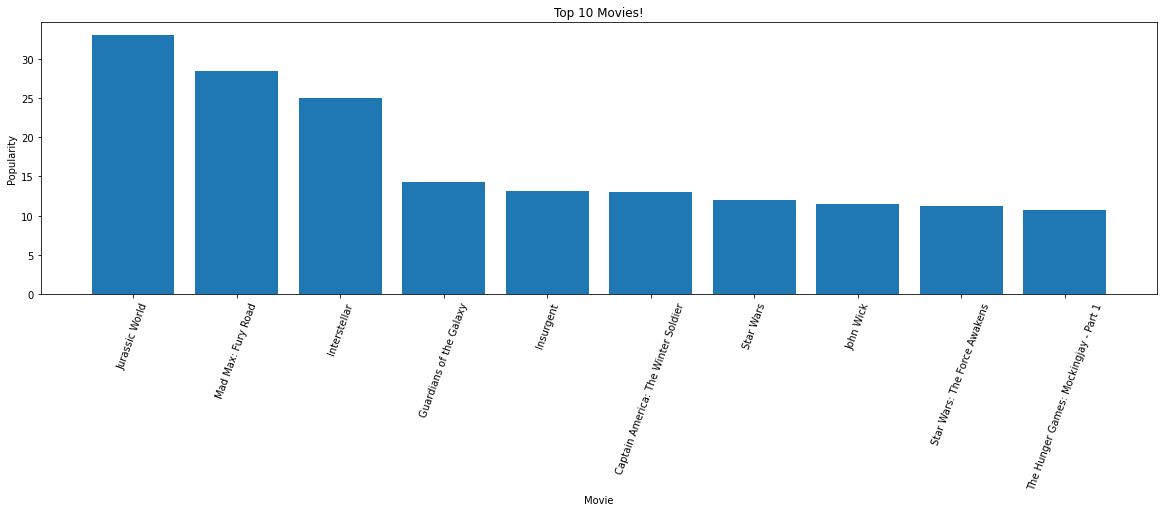

In [73]:
plt.bar(l.original_title, l.popularity)
plt.rcParams["figure.figsize"] = (10,5)
plt.xticks(rotation='70')
plt.gca().update(dict(title='Top 10 Movies!', xlabel='Movie', ylabel='Popularity'));

**Answer:** Top 10 Movies:
1. Jurassic World
2. MadMax: Fury Road
3. Interstellar
4. Guardians of the Galaxy
5. Insurgent
6. Captain America: The Winter Soldier
7. Star Wars
8. John Wick
9. Star Wars: The Force Awakens
10. The Hunger Games: Mockingjay - Part 1

<a id='conclusions'></a>
## Conclusions

As stated above, we can conclude the answers to our questions which helps us in analyzing the given data: 

* As time Passes, number of produced movies increases 
* Released movies in months 5,6,7,11,12 have higher tendency of success based on net profit
* Drama, Comedy, Thriller, Action, Romance are all time Most popular Genres
* Drama is the Top Genre of each year for ALOT of years, if it isn't drama, then it's Comedy!
* Warner Bros, Universal Pictures, Paramount Pictures are Top 3 Production companies based on total net profit
* People tend to like movies of 169 minutes runtime the best!
* Robert De Niro is the most frequent start in movies!
* Woody Allen, Clint Eastwood, Steven Speilberg are top 3 directors that have directed most movies!
* Jurassic World, MadMax:Fury, Interstellar are top 3 Popular Movies


**Limitations:**
* The dataset has alot of uninferred production companies, that I had inferred them manually to be global constant
* Alot of rows were dropped as getting away of NAN values, surely these records would have matterred!